In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.options.display.min_rows = 11

%config InlineBackend.figure_format="retina"  # enable retina display 



The iris dataset is a famous dataset that illustrates classification tasks in machine learning (or data mining). It contains the sepal and petal length and width of 150 iris flowers of 3 different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. Given sepal and petal lengths and widths, we can train a multiclass classifier capable of predicting the species of an iris.

<img alt="virginica_picture" src="https://raw.githubusercontent.com/justinjiajia/img/master/python/iris-species.png" width=580> 


The first rule of machine learning is to ***look at our data first***. 

Seaborn has a `load_dataset` function that allows us to quickly access sample datasets from its [online  repository](https://github.com/mwaskom/seaborn-data), which contains this iris dataset: 

In [2]:
iris = sns.load_dataset("iris"); iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
id              150 non-null int64
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000



To unveil possible patterns obsecured in data, we are going to use a seaborn function, `relplot`, to create a facet plot that includes two sub scatter plots as shown below:

<img alt="virginica_picture" src="https://raw.githubusercontent.com/justinjiajia/img/master/python/irisfacet.png" width=680> 

This plot reveals that the petal is more informative about iris species than the sepal, and should be included in a potential classifier first.

This seaborn plotting function expects the following input `DataFrame`:



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>feature</th>
      <th>species</th>
      <th>length</th>
      <th>width</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.4</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>sepal</td>
      <td>setosa</td>
      <td>5.1</td>
      <td>3.5</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.4</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>sepal</td>
      <td>setosa</td>
      <td>4.9</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.3</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>295</th>
      <td>147</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>6.5</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>296</th>
      <td>148</td>
      <td>petal</td>
      <td>virginica</td>
      <td>5.4</td>
      <td>2.3</td>
    </tr>
    <tr>
      <th>297</th>
      <td>148</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>6.2</td>
      <td>3.4</td>
    </tr>
    <tr>
      <th>298</th>
      <td>149</td>
      <td>petal</td>
      <td>virginica</td>
      <td>5.1</td>
      <td>1.8</td>
    </tr>
    <tr>
      <th>299</th>
      <td>149</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>5.9</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

Please follow the instructions to derive intermediate `DataFrame`s that lead to the `DataFrame` of the above form.


1. Create a new `id` column to track individual iris observations during the process of data transformations. The output should look like the following:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>sepal_length</th>
      <th>sepal_width</th>
      <th>petal_length</th>
      <th>petal_width</th>
      <th>species</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>5.1</td>
      <td>3.5</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>4.9</td>
      <td>3.0</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>4.7</td>
      <td>3.2</td>
      <td>1.3</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>4.6</td>
      <td>3.1</td>
      <td>1.5</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>5.0</td>
      <td>3.6</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>145</th>
      <td>145</td>
      <td>6.7</td>
      <td>3.0</td>
      <td>5.2</td>
      <td>2.3</td>
      <td>virginica</td>
    </tr>
    <tr>
      <th>146</th>
      <td>146</td>
      <td>6.3</td>
      <td>2.5</td>
      <td>5.0</td>
      <td>1.9</td>
      <td>virginica</td>
    </tr>
    <tr>
      <th>147</th>
      <td>147</td>
      <td>6.5</td>
      <td>3.0</td>
      <td>5.2</td>
      <td>2.0</td>
      <td>virginica</td>
    </tr>
    <tr>
      <th>148</th>
      <td>148</td>
      <td>6.2</td>
      <td>3.4</td>
      <td>5.4</td>
      <td>2.3</td>
      <td>virginica</td>
    </tr>
    <tr>
      <th>149</th>
      <td>149</td>
      <td>5.9</td>
      <td>3.0</td>
      <td>5.1</td>
      <td>1.8</td>
      <td>virginica</td>
    </tr>
  </tbody>
</table>

In [ ]:
# write your code here





2. Convert the `DataFrame` from wide format to long format, pushing data that currently spread across `sepal_length`,	`sepal_width`,	`petal_length`,	and `petal_width` columns into rows.  Name the resulting `DataFrame` `iris_l`. The output should look like the following:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>species</th>
      <th>feature</th>
      <th>value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>setosa</td>
      <td>sepal_length</td>
      <td>5.1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>setosa</td>
      <td>sepal_length</td>
      <td>4.9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>setosa</td>
      <td>sepal_length</td>
      <td>4.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>setosa</td>
      <td>sepal_length</td>
      <td>4.6</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>setosa</td>
      <td>sepal_length</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>595</th>
      <td>145</td>
      <td>virginica</td>
      <td>petal_width</td>
      <td>2.3</td>
    </tr>
    <tr>
      <th>596</th>
      <td>146</td>
      <td>virginica</td>
      <td>petal_width</td>
      <td>1.9</td>
    </tr>
    <tr>
      <th>597</th>
      <td>147</td>
      <td>virginica</td>
      <td>petal_width</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th>598</th>
      <td>148</td>
      <td>virginica</td>
      <td>petal_width</td>
      <td>2.3</td>
    </tr>
    <tr>
      <th>599</th>
      <td>149</td>
      <td>virginica</td>
      <td>petal_width</td>
      <td>1.8</td>
    </tr>
  </tbody>
</table>

In [ ]:
# write your code here







3.  Pandas provides a `Series` method, `str.split`, that can split string values around a delimiter and spread the results into different columns. For the detail, see `help(pd.Series.str.split)`. Run the provided code directly to get a `DataFrame` as follows:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>species</th>
      <th>feature</th>
      <th>value</th>
      <th>subfeature</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>setosa</td>
      <td>sepal</td>
      <td>5.1</td>
      <td>length</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>setosa</td>
      <td>sepal</td>
      <td>4.9</td>
      <td>length</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>setosa</td>
      <td>sepal</td>
      <td>4.7</td>
      <td>length</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>setosa</td>
      <td>sepal</td>
      <td>4.6</td>
      <td>length</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>setosa</td>
      <td>sepal</td>
      <td>5.0</td>
      <td>length</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>595</th>
      <td>145</td>
      <td>virginica</td>
      <td>petal</td>
      <td>2.3</td>
      <td>width</td>
    </tr>
    <tr>
      <th>596</th>
      <td>146</td>
      <td>virginica</td>
      <td>petal</td>
      <td>1.9</td>
      <td>width</td>
    </tr>
    <tr>
      <th>597</th>
      <td>147</td>
      <td>virginica</td>
      <td>petal</td>
      <td>2.0</td>
      <td>width</td>
    </tr>
    <tr>
      <th>598</th>
      <td>148</td>
      <td>virginica</td>
      <td>petal</td>
      <td>2.3</td>
      <td>width</td>
    </tr>
    <tr>
      <th>599</th>
      <td>149</td>
      <td>virginica</td>
      <td>petal</td>
      <td>1.8</td>
      <td>width</td>
    </tr>
  </tbody>
</table>

In [ ]:
iris_l[['feature', 'subfeature']] = iris_l['feature'].str.split('_', expand=True)
iris_l

,id,species,feature,value,subfeature
0,0,setosa,sepal,5.1,length
1,1,setosa,sepal,4.9,length
2,2,setosa,sepal,4.7,length
3,3,setosa,sepal,4.6,length
4,4,setosa,sepal,5.0,length
5,5,setosa,sepal,5.4,length
6,6,setosa,sepal,4.6,length
...,...,...,...,...,...
593,143,virginica,petal,2.3,width
594,144,virginica,petal,2.5,width


4. Convert the `DataFrame` from long format to wide format, pulling values of `length` and `width` across rows into their own columns.  Name the resulting `DataFrame` `iris_w`. The output should look like the following:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>feature</th>
      <th>species</th>
      <th>length</th>
      <th>width</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.4</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>sepal</td>
      <td>setosa</td>
      <td>5.1</td>
      <td>3.5</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.4</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>sepal</td>
      <td>setosa</td>
      <td>4.9</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>petal</td>
      <td>setosa</td>
      <td>1.3</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>295</th>
      <td>147</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>6.5</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>296</th>
      <td>148</td>
      <td>petal</td>
      <td>virginica</td>
      <td>5.4</td>
      <td>2.3</td>
    </tr>
    <tr>
      <th>297</th>
      <td>148</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>6.2</td>
      <td>3.4</td>
    </tr>
    <tr>
      <th>298</th>
      <td>149</td>
      <td>petal</td>
      <td>virginica</td>
      <td>5.1</td>
      <td>1.8</td>
    </tr>
    <tr>
      <th>299</th>
      <td>149</td>
      <td>sepal</td>
      <td>virginica</td>
      <td>5.9</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

In [ ]:
# write your code here







5. Now we readily create the facet plot we've seen by calling `sns.relplot`:


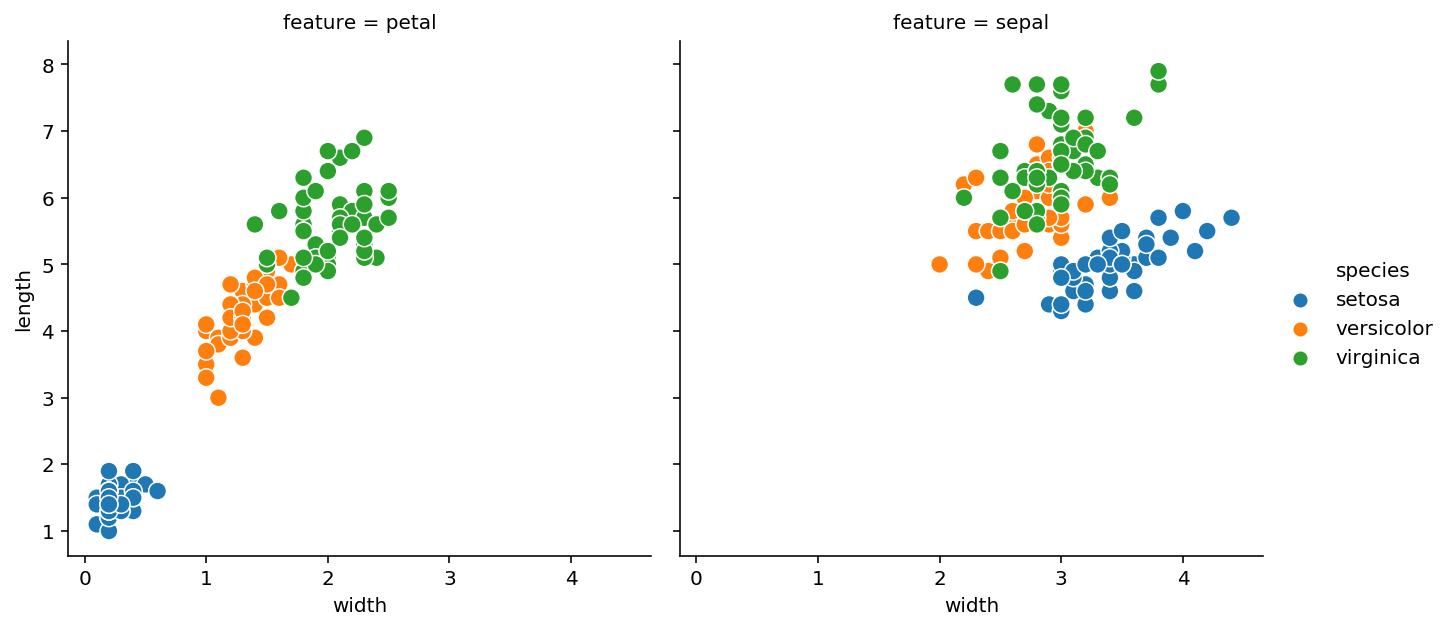

In [ ]:
sns.relplot('width', 'length', hue='species', col="feature", s=80, data=iris_w, height=4.5)
plt.show()